<a href="https://colab.research.google.com/github/akash-singh-10/Deep-Learning/blob/main/DLA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, models, layers
import matplotlib.pyplot as plt
import random
import numpy as np

In [45]:
mnist_dataset = tf.keras.datasets.mnist

In [46]:
(x_train, y_train),(x_test, y_test) = mnist_dataset.load_data()

In [36]:
len(x_train)

60000

In [37]:
x_train.shape

(60000, 28, 28)

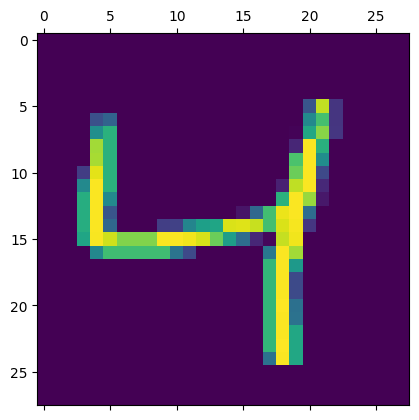

In [38]:
plt.matshow(x_train[2])

In [39]:
x_train = x_train/255
x_test = x_test/255

In [40]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [41]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [43]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6500 - accuracy: 0.8358 - val_loss: 0.3523 - val_accuracy: 0.9054
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3340 - accuracy: 0.9071 - val_loss: 0.2906 - val_accuracy: 0.9186
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2868 - accuracy: 0.9193 - val_loss: 0.2588 - val_accuracy: 0.9286
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2579 - accuracy: 0.9275 - val_loss: 0.2367 - val_accuracy: 0.9349
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2360 - accuracy: 0.9333 - val_loss: 0.2224 - val_accuracy: 0.9367


KeyboardInterrupt: ignored

In [27]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("loss = %.3f"%test_loss)
print("acc = %.3f"%test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2256 - accuracy: 0.9384
loss = 0.226
acc = 0.938


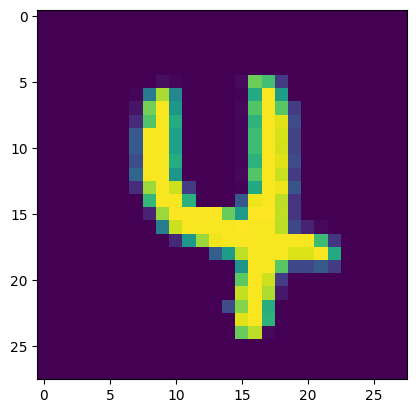

In [28]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [29]:
predicted_value = model.predict(x_test)
print("number in the image is = %d"%np.argmax(predicted_value[n]))

313/313 [==============================] - 0s 1ms/step
number in the image is = 4


In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

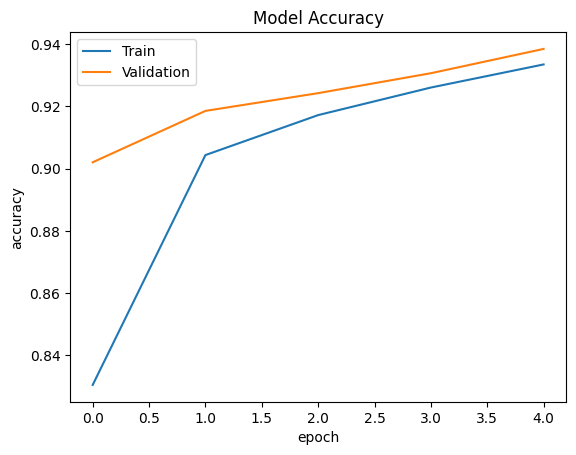

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

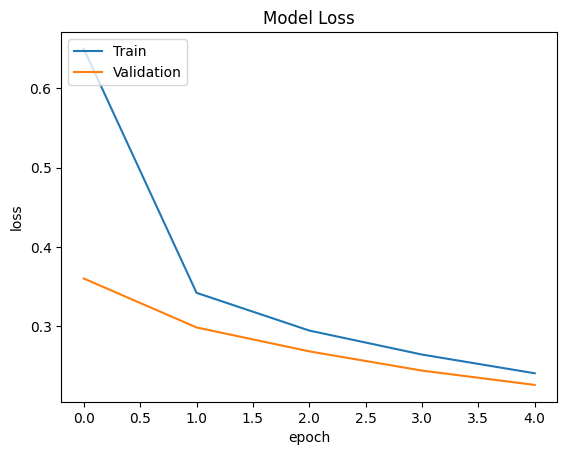

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()